Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Importing the dataset from drive 



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataFrame=pd.read_csv("/content/drive/MyDrive/ML Data/iris data.csv",header=None);
dataFrame.columns=["Petal Length","Petal Width","Sepal Length","Sepal Width","Species"];
print(dataFrame.head(30));

    Petal Length  Petal Width  Sepal Length  Sepal Width      Species
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

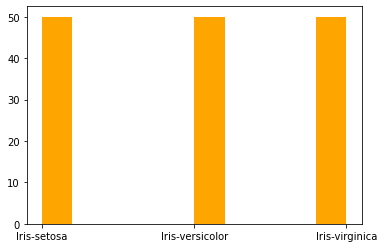

In [ ]:
plt.hist(dataFrame["Species"],color="Orange")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated

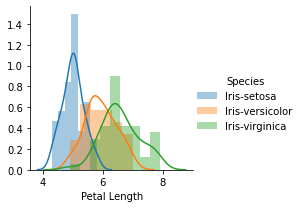

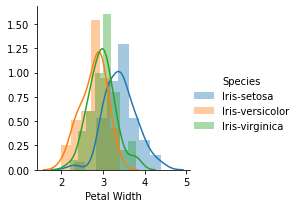

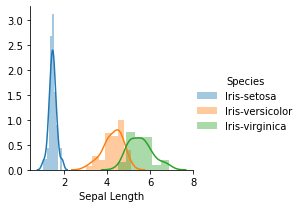

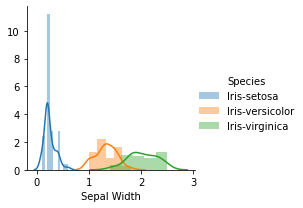

In [ ]:
import seaborn as sns
sns.FacetGrid(dataFrame,hue="Species",size=3).map(sns.distplot,"Petal Length").add_legend()
sns.FacetGrid(dataFrame,hue="Species",size=3).map(sns.distplot,"Petal Width").add_legend()
sns.FacetGrid(dataFrame,hue="Species",size=3).map(sns.distplot,"Sepal Length").add_legend()
sns.FacetGrid(dataFrame,hue="Species",size=3).map(sns.distplot,"Sepal Width").add_legend()
plt.show()

In [ ]:
dataFrame.describe()

,Petal Length,Petal Width,Sepal Length,Sepal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Assigning Attributes in a numpy array:


In [ ]:
attributes = dataFrame.iloc[:, [0, 1, 2, 3]].values
type(attributes)
labels = dataFrame.iloc[:, 4].values
type(labels)

numpy.ndarray

# Elbow method

Now we will implement 'The elbow method' on the Iris dataset. The elbow method allows us to pick the optimum amount of clusters for classification

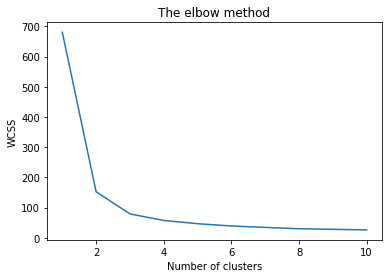

In [ ]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(attributes)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

# Model Training

In the above graph, Implementing the elbow method, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration. Now we have the optimum amount of clusters, we can move on to applying K-means clustering to the Iris dataset. Considering the point of occuring of elbow to be 3, i.e. 3 clusters will be the optimum solution for this problem.

Splitting data in 70:30 ratio for training and validation

In [ ]:
from sklearn.model_selection import train_test_split
validation_size = 0.30

x_train, x_val, y_train, y_val = train_test_split(
    attributes,
    labels,
    test_size=validation_size,
    random_state=10,
    stratify=labels,    
)

In [ ]:
print(len(x_train), len(x_val))

105 45


In [ ]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3,init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x_train)

# Scatter Plot

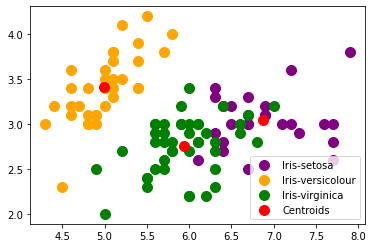

In [ ]:
#Visualising the clusters
plt.scatter(x_train[y_kmeans == 0, 0], x_train[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x_train[y_kmeans == 1, 0], x_train[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x_train[y_kmeans == 2, 0], x_train[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

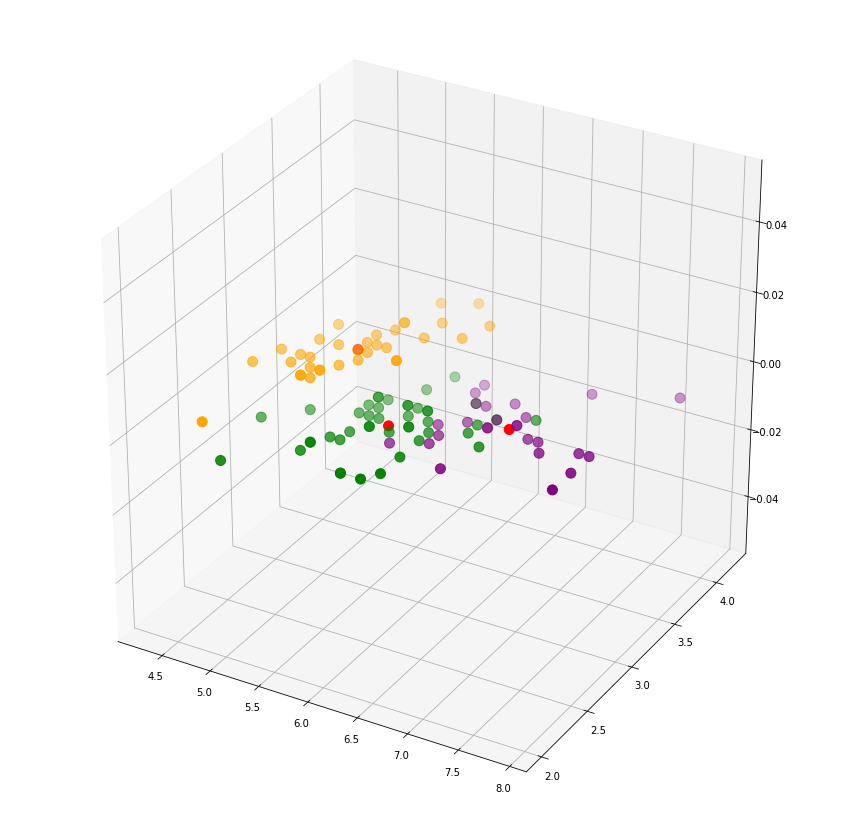

In [ ]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x_train[y_kmeans == 0, 0], x_train[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x_train[y_kmeans == 1, 0], x_train[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x_train[y_kmeans == 2, 0], x_train[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.show()

# Model accuracy check and classification report

Converting true labels to their respective class numbers:


*   Virginica Class 1
*   Setosa Class 0
*   Versicolor Class 2

In [ ]:
predictions_train = np.choose(y_kmeans, ["Iris-virginica", "Iris-setosa", "Iris-versicolor"])
print(predictions_train)

['Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'I

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
accuracy_score(y_train, predictions_train)

0.8761904761904762

In [ ]:
print(classification_report(y_train, predictions_train, digits=5))

                 precision    recall  f1-score   support

    Iris-setosa    1.00000   1.00000   1.00000        35
Iris-versicolor    0.75000   0.94286   0.83544        35
 Iris-virginica    0.92308   0.68571   0.78689        35

       accuracy                        0.87619       105
      macro avg    0.89103   0.87619   0.87411       105
   weighted avg    0.89103   0.87619   0.87411       105



Validation Set

In [ ]:
y_predicted = kmeans.fit_predict(x_val)

In [ ]:
predictions_val = np.choose(y_predicted, ["Iris-versicolor","Iris-virginica","Iris-setosa"])
print(predictions_val)

['Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor']


In [ ]:
print(y_val)

['Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor']


In [ ]:
accuracy_score(y_val, predictions_val)

0.9333333333333333

In [ ]:
print(classification_report(y_val, predictions_val, digits=5))

                 precision    recall  f1-score   support

    Iris-setosa    1.00000   1.00000   1.00000        15
Iris-versicolor    1.00000   0.80000   0.88889        15
 Iris-virginica    0.83333   1.00000   0.90909        15

       accuracy                        0.93333        45
      macro avg    0.94444   0.93333   0.93266        45
   weighted avg    0.94444   0.93333   0.93266        45



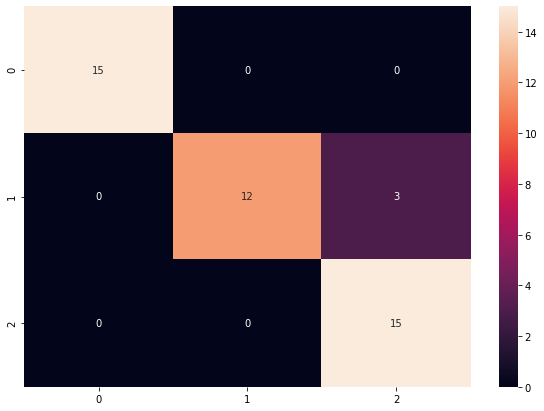

In [ ]:
import seaborn as sn
import pandas as pd
from sklearn.metrics import confusion_matrix
array = confusion_matrix(y_val,predictions_val)
df_cm = pd.DataFrame(array, index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

plt.show()